In [15]:
from pathlib import Path
import pandas as pd

# Arrhythmia Dataset

- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes:
    - 'Normal': 0, 
    - 'Supraventricular ectopic beat': 1, 
    - 'Ventricular ectopic beat': 2, 
    - 'Fusion beat': 3, 
    - 'Unknown beat': 4
- All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 187. There is a target column named "target".

How is the train/test split?

In [16]:
datadir = Path('/home/svelthuis/Hackathon/group_c/hackathon-data/')
trainfile = datadir / 'heart_big_train.parq'
validfile = datadir / 'heart_big_valid.parq'

train_df = pd.read_parquet(trainfile)
valid_df = pd.read_parquet(validfile)
len(train_df), len(valid_df)

(87554, 10946)

And what about the balance of the target?

In [17]:
train_df.target.value_counts(), valid_df.target.value_counts()
train_percentages = train_df.target.value_counts(normalize=True) * 100
valid_percentages = valid_df.target.value_counts(normalize=True) * 100
train_percentages,  valid_percentages

(target
 0.0    82.772917
 4.0     7.345181
 2.0     6.610777
 1.0     2.539005
 3.0     0.732120
 Name: proportion, dtype: float64,
 target
 0.0    82.760826
 4.0     7.345149
 2.0     6.614288
 1.0     2.539741
 3.0     0.739996
 Name: proportion, dtype: float64)

What does the signal look like?

0      1.000000
1      0.659459
2      0.186486
3      0.070270
4      0.070270
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 2, Length: 187, dtype: float64


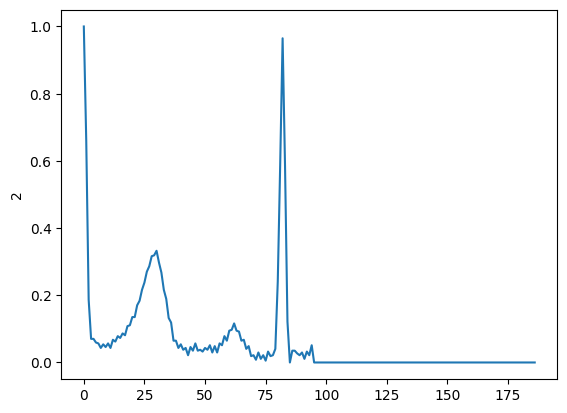

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

signal = train_df.iloc[2, :-1]
print(signal)

sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

In [19]:
train_df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186',
       'target'],
      dtype='object', length=188)

In [20]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [22]:
# do undersampling to balance the classes
grouped = train_df.groupby('target')
grouped = grouped.sample(n=grouped.size().max(), replace=True)
grouped.target.value_counts()

target
0.0    72471
1.0    72471
2.0    72471
3.0    72471
4.0    72471
Name: count, dtype: int64

In [13]:
grouped.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
count,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,...,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000,3205.000000
mean,0.832569,0.727558,0.474161,0.308331,0.270209,0.265105,0.251612,0.240892,0.228671,0.209586,...,0.012080,0.011406,0.010920,0.009987,0.009447,0.008982,0.008935,0.008750,0.008796,2.000000
std,0.292976,0.270641,0.252606,0.249439,0.224500,0.207087,0.204606,0.194255,0.177088,0.169211,...,0.069136,0.068494,0.065503,0.061093,0.060397,0.059885,0.058541,0.056633,0.057208,1.414434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.819957,0.609155,0.276596,0.100890,0.104478,0.117725,0.103327,0.094340,0.091418,0.087475,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.972067,0.825726,0.481752,0.263158,0.191919,0.182573,0.162037,0.177215,0.189904,0.164269,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,0.921854,0.645963,0.466491,0.389728,0.381579,0.379310,0.354658,0.314376,0.276490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.979381,0.969231,...,1.000000,1.000000,1.000000,0.946210,0.940741,1.000000,1.000000,0.713376,0.742317,4.000000


In [ ]:
# show one unique row for each different target value
unique_values = train_df.drop_duplicates(subset='target').reset_index(drop=True)
unique_values

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,target
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.666667,0.100457,0.036530,0.073059,0.050228,0.018265,0.105023,0.132420,0.091324,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0.009756,0.074390,0.162195,0.240244,0.291463,0.370732,0.442683,0.498780,0.560976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,1.000000,0.899749,0.641604,0.314536,0.101504,0.107769,0.111529,0.071429,0.063910,0.058897,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.712610,0.629032,0.527859,0.414956,0.284457,0.164223,0.080645,0.032258,0.000000,0.016129,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


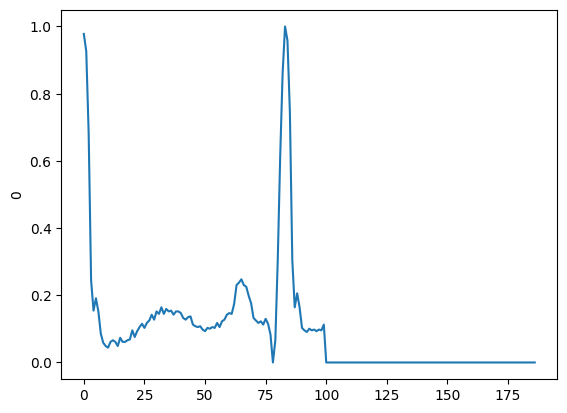

In [ ]:
# show the fourth row in a graph
signal = unique_values.iloc[0, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));


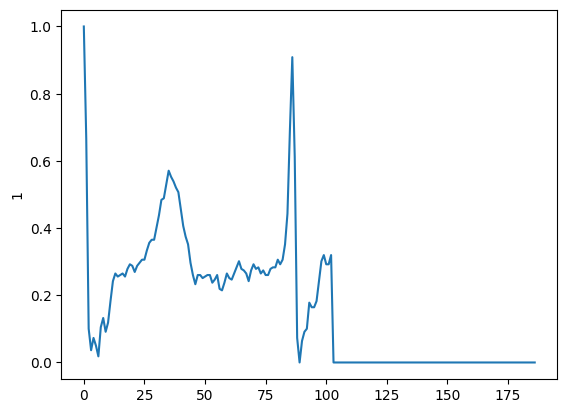

In [ ]:
signal = unique_values.iloc[1, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

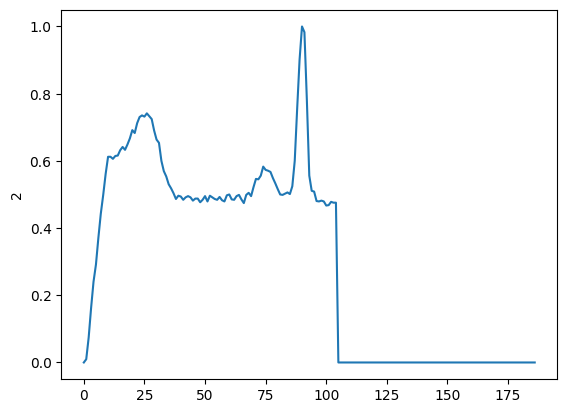

In [ ]:
signal = unique_values.iloc[2, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));

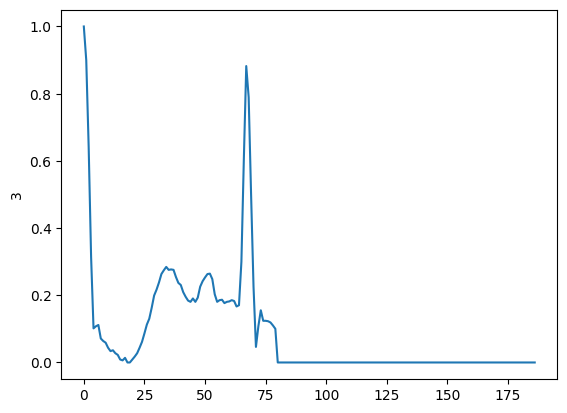

In [ ]:

signal = unique_values.iloc[3, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));


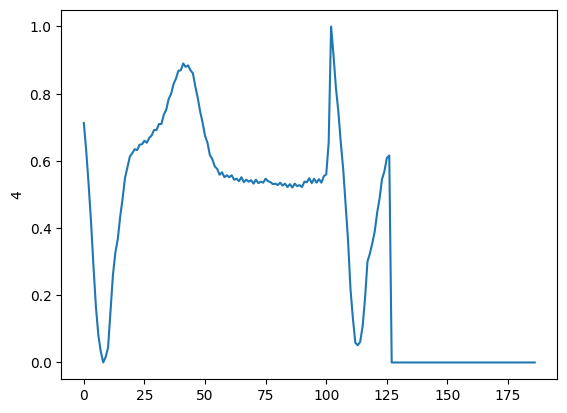

In [ ]:
signal = unique_values.iloc[4, :-1]
sns.lineplot(data=signal)
plt.xticks(range(0, len(signal), 25));